# EDA, Preprocessing and Modeling

## Contents

* Introduction 
* Exploratory Data Analysis
    * Feature Definitions
    * Imports
    * Load the Data
    * Explore the Data
        * Summary statistics 
        * Distribution plots
        * Feature correlation heatmap
        * Most popular songs
        * Features over time
        * Plotting some columns of Dataset
        * Visualizing the basic statistics using boxplot
        * Most popular songs
        * Popular artists and Top 20 artists based on popularity score
* Training the data and Modeling
    * Training the data
        * Import
        * Splitting a data Train and Test
    * Modeling
        * Random Forest Model
            * Make a Pipeline
            * Using a  $𝑅^2$ , Mean Square Error to Assess model performance
            * Fit and assess performance using cross-validation
            * Hyperparameter search using GridSeaDrchCV
        * Gradentboosting Regressor
            * Define Model
            * Using a  𝑅2 , Mean Square Error to Assess model performance
        * Neural Network
            * Imports
            * Scale Data
            * Define Model
            * Compile 
      
* Summary
* Further scope
            
    
        

## Introduction

Music streaming services have become the most popular method for consumers to listen to music. With over 36% market share among online music subscribers and having a base of over 100 million subscribers, Spotify occupies the top spot. This project's goal is develop a model that predicts the popularity of the song.    

## Spotify Exploratory Data Analysis

   In this EDA, we will take a look at the features of the dataset, closer look at few of them in order to have a better understanding for the rest of the analysis. In order to access them a bit more practically, we need a definition of the features. Here are definition of features. 

### Feature Definitions
1. artists: The list of artists of the song
2. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
3. duration_ms: The duration of the track in milliseconds
4. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. (Float)
5. explicit: The content item is explicit and the user’s account is set to not play explicit content. Additional reasons may be added in the future. Note: If you use this field, make sure that your application safely handles unknown values.
6. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
7. The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
8. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
9. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
10.  mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
11. name: Name of the song.
12. popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
13. release_date: The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
14. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
15. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
16. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
17. year: Year information extracted from release_date.

### Imports

In [197]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport


### Load the data

In [81]:
tracks = pd.read_csv('tracks.csv')

In [82]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [98]:
tracks['release_date'] = pd.to_datetime(tracks.release_date)
tracks['year'] = tracks.release_date.dt.year

In [99]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
year                 0
dtype: int64

In [100]:
tracks= tracks.dropna()

In [101]:
tracks = tracks[~tracks.duplicated()==1]

In [102]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      586601 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  int64         
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  int64         
 13  speechiness       586601 non-null  float64       
 14  acou

#### Summary statistics

In [103]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,1988.571729
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,22.826243
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,1974.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,1992.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,2007.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000


In [177]:
def get_stats(df):
    # print stats for various metrics
    print(f"There are {df.shape[0]} rows")
    print(f"There are {df['id'].unique().shape} unique songs")
    print(f"There are {df['artists'].unique().shape} unique artists")
    print(f"There are {df['popularity'].unique().shape} popularity scores")
    print(f"The mean popularity score is {df['popularity'].mean()}")
    print(f"There are {df[df['popularity'] > 55]['popularity'].count()} songs with a popularity score > 55")
    print(f"There are {df[df['popularity'] > 75]['popularity'].count()} songs with a popularity score > 75")
    print(f"Only {(df[df['popularity'] > 80]['popularity'].count() / df.shape[0])*100:.2f} % of songs have a popularity score > 80")


In [178]:
get_stats(tracks)

There are 586601 rows
There are (586601,) unique songs
There are (114029,) unique artists
There are (101,) popularity scores
The mean popularity score is 27.573212456166967
There are 43178 songs with a popularity score > 55
There are 2423 songs with a popularity score > 75
Only 0.13 % of songs have a popularity score > 80


### Correlations

Let's see the correlations between continous metrics

<AxesSubplot:>

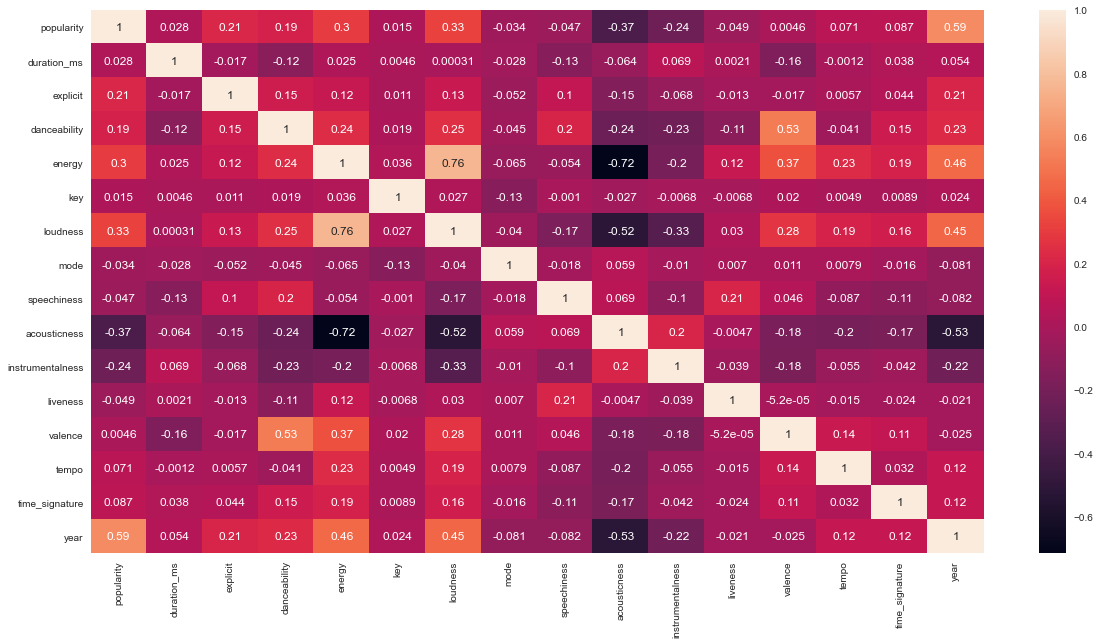

In [104]:
plt.figure(figsize=(20, 10))
sns.heatmap(tracks.corr(), annot=True)

From the heatmap, year, danceability, energy, loudness, and tempo are important features for predicting popularity. 

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

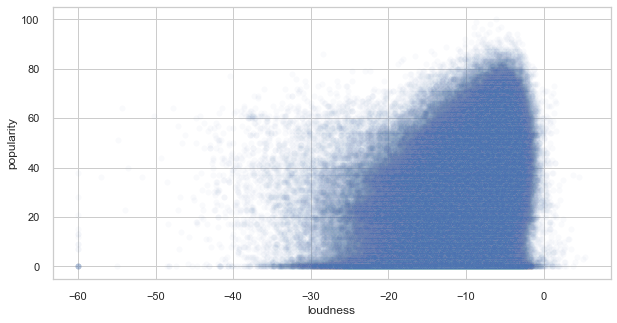

In [182]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'loudness', y = 'popularity', data = tracks, alpha = 0.03)


<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

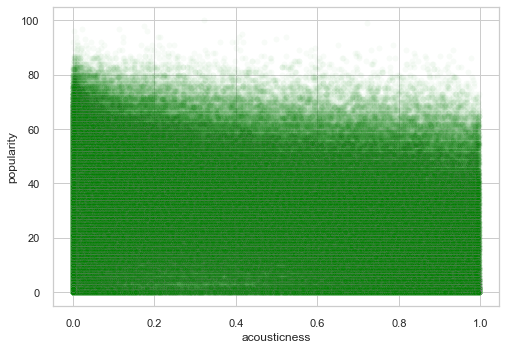

In [183]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = tracks, alpha = 0.03, color = 'green')

<AxesSubplot:xlabel='year', ylabel='popularity'>

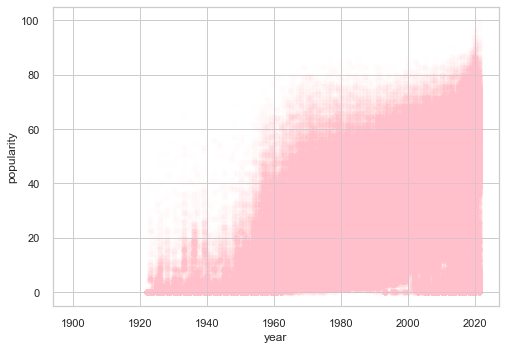

In [184]:
sns.scatterplot(x = 'year', y = 'popularity', data = tracks, alpha = 0.03, color = 'pink')

#### Distribution plots

(586601, 21)


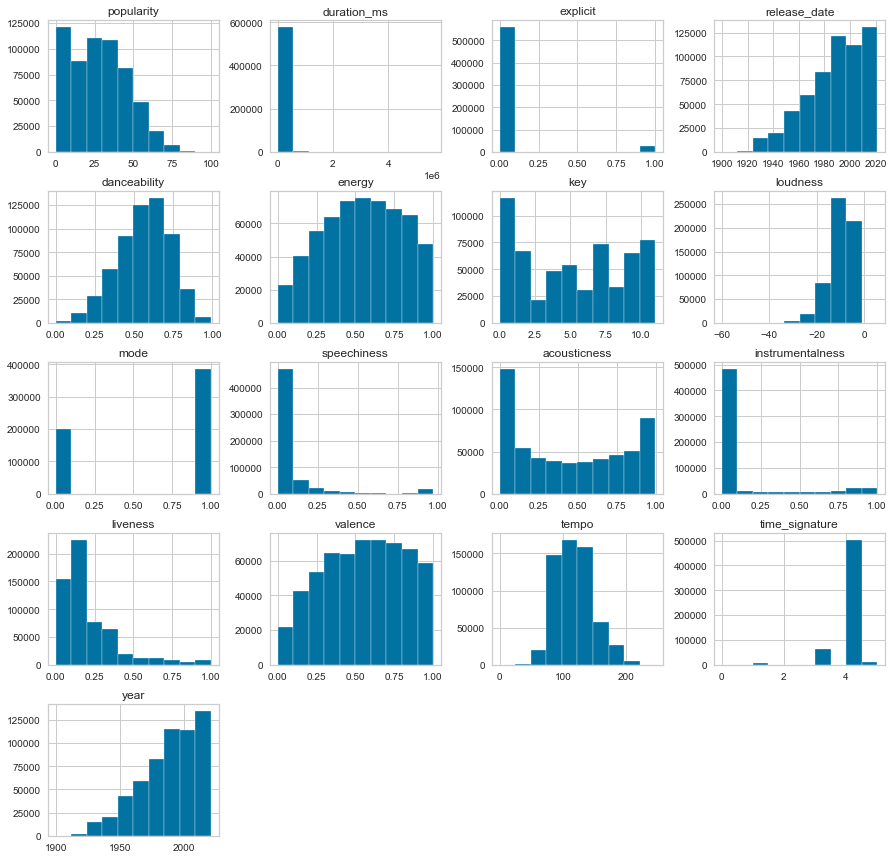

In [105]:
print(tracks.shape)
tracks.hist(figsize=(15, 15))
plt.show()

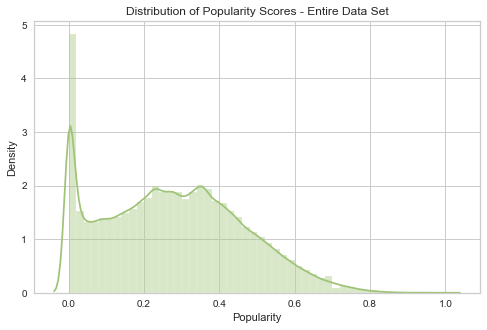

In [106]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
sns.distplot(tracks['popularity']/100, color='g', label="Popularity").set_title("Distribution of Popularity Scores - Entire Data Set")
plt.xlabel("Popularity")
plt.ylabel("Density")

plt.show()

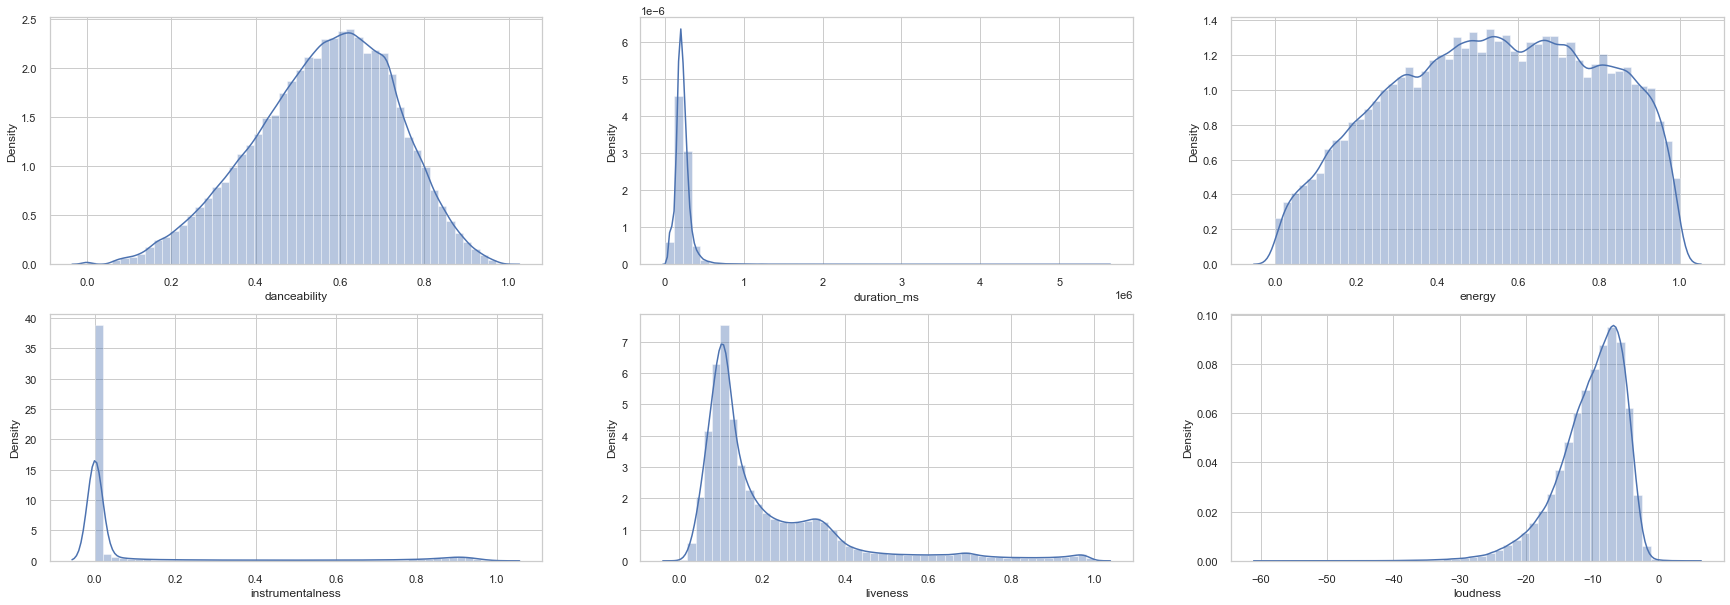

In [181]:
plt.figure(figsize = (30, 10))
plt.subplot(231)
sns.distplot(tracks['danceability'])
plt.subplot(232)
sns.distplot(tracks['duration_ms'])
plt.subplot(233)
sns.distplot(tracks['energy'])
plt.subplot(234)
sns.distplot(tracks['instrumentalness'])
plt.subplot(235)
sns.distplot(tracks['liveness'])
plt.subplot(236)
sns.distplot(tracks['loudness'])
plt.show()

From the distribution plots, most features are normally distributed with densities centered rather closely near the mean. 


#### Most popular songs

In [109]:
def most_popular_songs(df):
    most_popular = df[df['popularity'] > 90]['popularity'].count()
    print(df[df['popularity'] > 90][['name', 'popularity']])

In [110]:
most_popular_songs(tracks)

                                                    name  popularity
91866                                            Streets          94
91867                                   Watermelon Sugar          92
92810                                    Save Your Tears          97
92811                                          telepatía          97
92813                                    Blinding Lights          96
92814                                       The Business          95
92816                             Heartbreak Anniversary          94
92817                                        WITHOUT YOU          94
92819                                            Bandido          94
92821                                 LA NOCHE DE ANOCHE          93
92823                                          Good Days          93
92824                                             DÁKITI          92
92826                                          positions          92
92827                             

#### Visualizing the basic statistics using boxplot

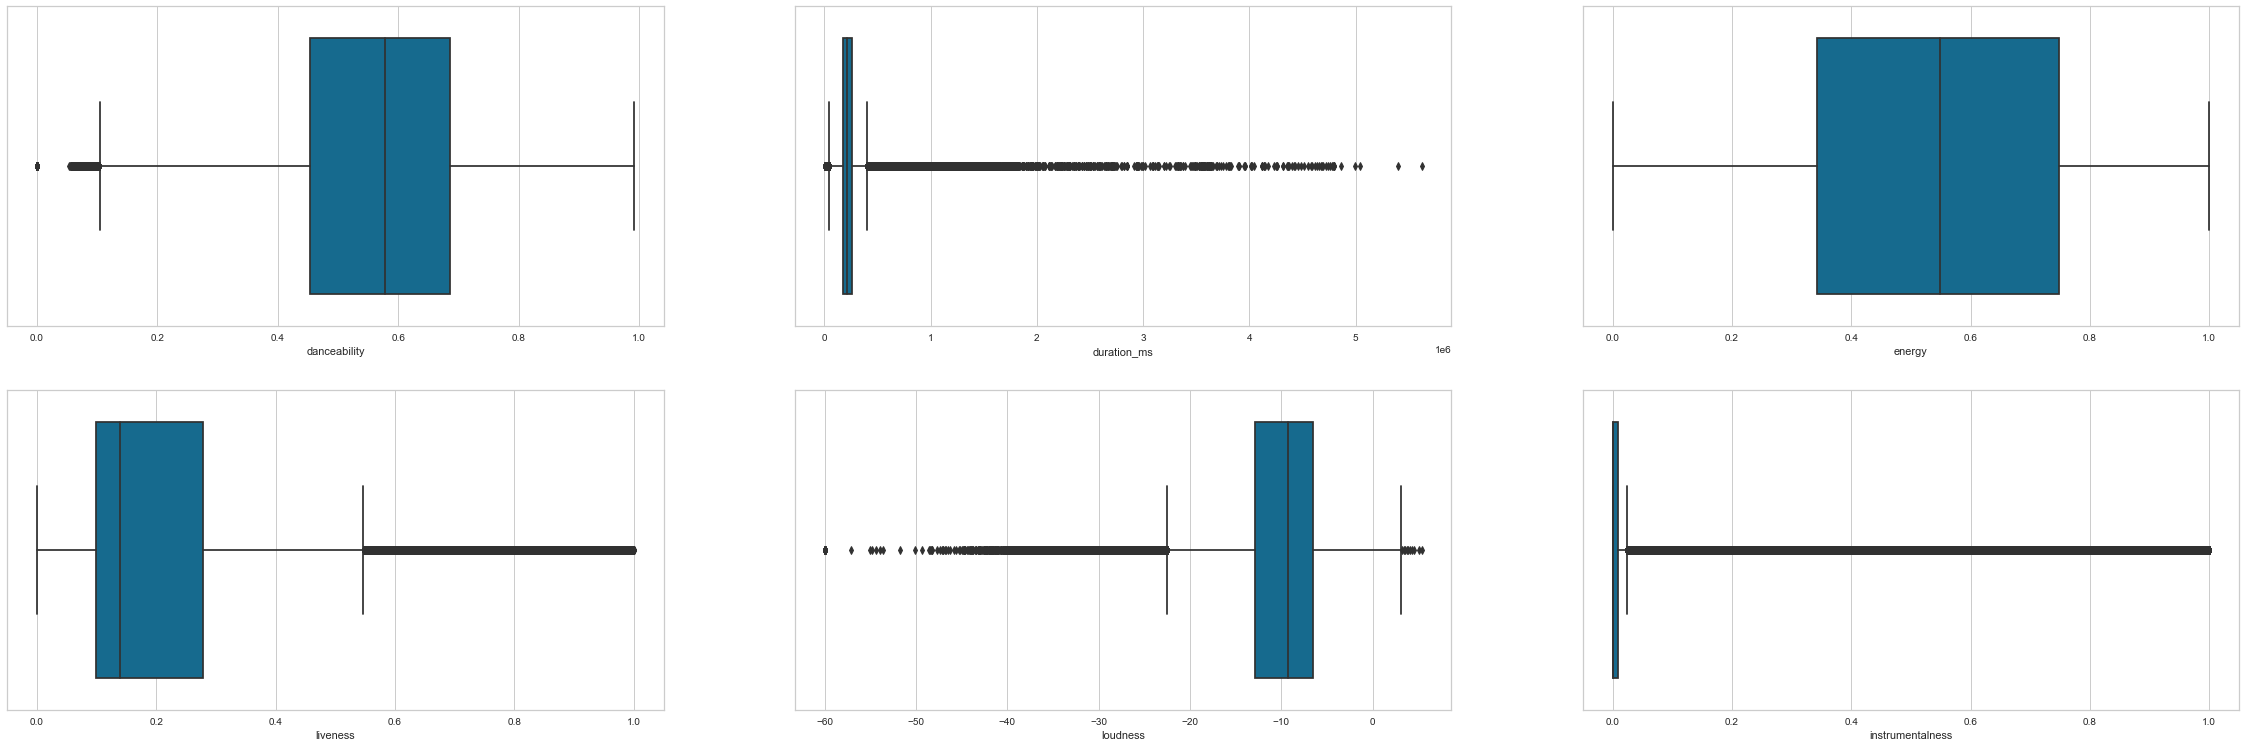

In [113]:
plt.figure(figsize = (40, 20))
plt.subplot(331)
sns.boxplot(tracks['danceability'])
plt.subplot(332)
sns.boxplot(tracks['duration_ms'])
plt.subplot(333)
sns.boxplot(tracks['energy'])
plt.subplot(334)
sns.boxplot(tracks['liveness'])
plt.subplot(335)
sns.boxplot(tracks['loudness'])
plt.subplot(336)
sns.boxplot(tracks['instrumentalness'])
plt.show()

#### Features over time

In [114]:
groups = tracks[tracks['year']>=1950].groupby(['year']).mean()

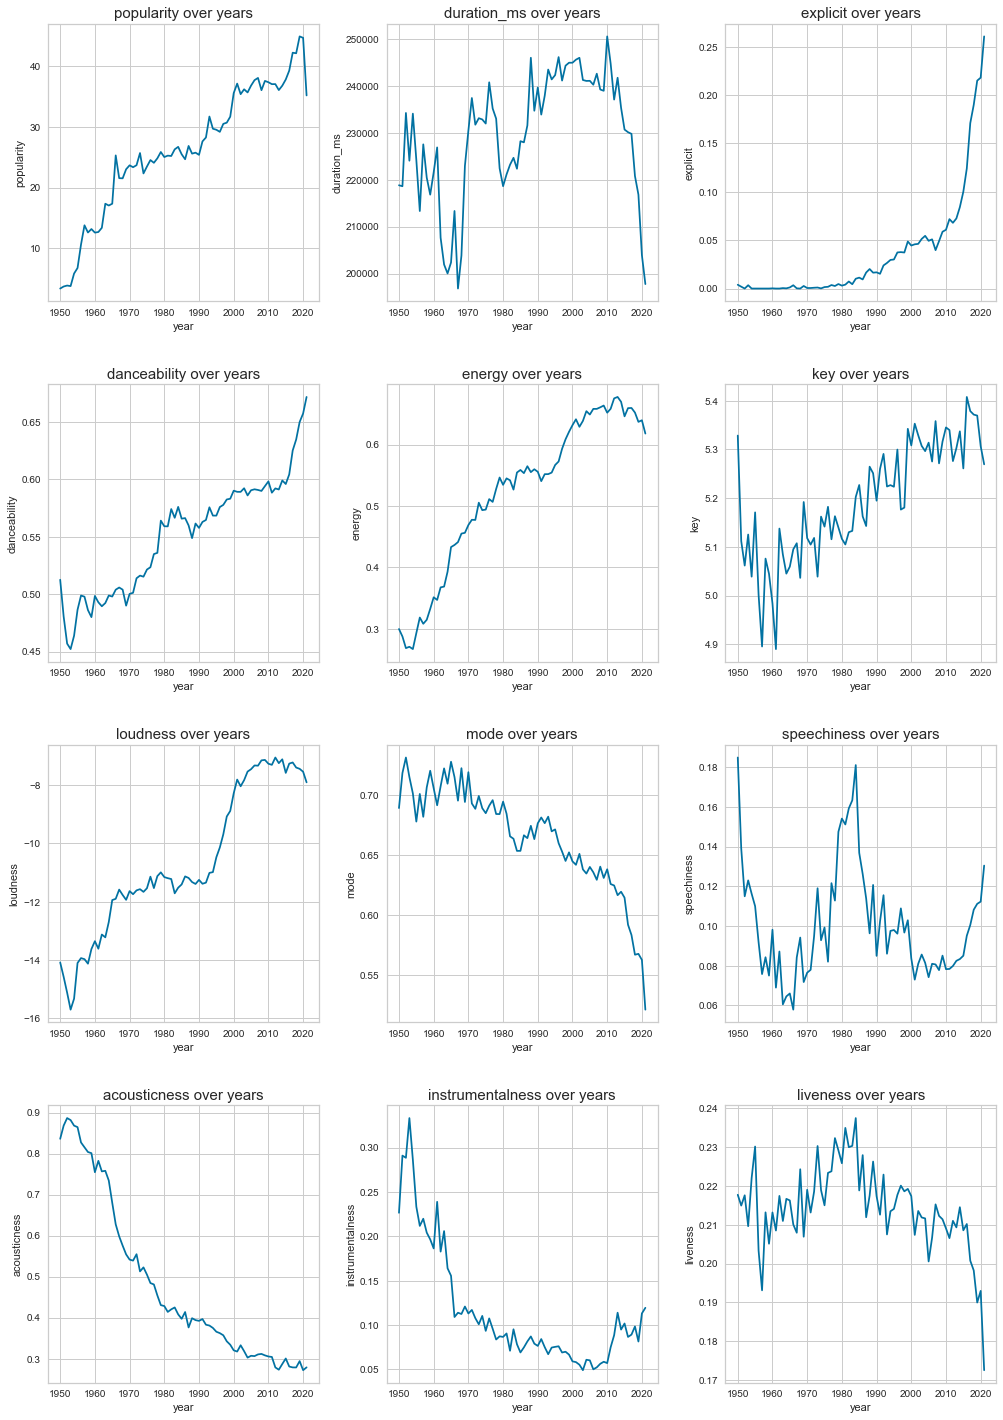

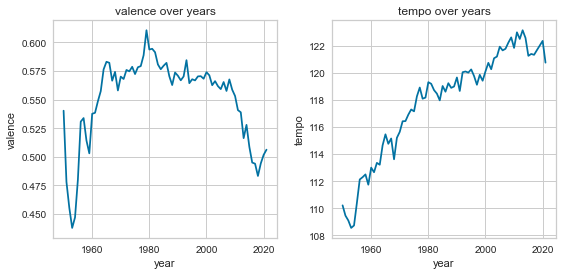

In [115]:
# features over the years
fig, axes1 = plt.subplots(4, 3, figsize=(17, 25))
plt.subplots_adjust(hspace=0.3, wspace=0.25)
fig, axes2 = plt.subplots(1, 2, figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for row in axes1:
    for ax in row:
        col = groups.columns[list(axes1.flatten()).index(ax)]
        ax.plot(groups.index, groups[col])
        ax.set_title(col + ' over years', size=15)
        ax.set_xlabel('year')
        ax.set_ylabel(col)
        
for ax in axes2:
    col = groups.columns[list(axes2.flatten()).index(ax)+12]
    ax.plot(groups.index, groups[col])
    ax.set_title(col + ' over years', size=12)
    ax.set_xlabel('year')
    ax.set_ylabel(col)

plt.show()

#### Most popular songs

In [116]:
popularity= tracks.copy().sort_values(by=['popularity'],ascending=False)[['popularity','name','artists']][0:100]

In [117]:
popularity

,popularity,name,artists
93802,100,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,99,drivers license,['Olivia Rodrigo']
93804,98,Astronaut In The Ocean,['Masked Wolf']
92811,97,telepatía,['Kali Uchis']
92810,97,Save Your Tears,['The Weeknd']
...,...,...,...
91888,87,Ride It,['Regard']
87949,87,The Hills,['The Weeknd']
92893,87,Lemonade,"['Internet Money', 'Gunna', 'Don Toliver', 'NAV']"
92895,87,Wishing Well,['Juice WRLD']


In [118]:
tracks_popular = tracks[tracks.popularity > 90].sort_values(by = 'popularity', ascending = False)
tracks_popular.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2020


#### Popular artists and Top 20 artists based on popularity score

In [122]:
popular_artists = tracks.groupby("artists").agg({"popularity":np.mean}).sort_values(by= 'popularity', ascending=False).reset_index()

In [123]:
top20 = popular_artists.head(20)
top20

,artists,popularity
0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",94.0
1,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94.0
2,"['Bad Bunny', 'ROSALÍA']",93.0
3,"['Travis Scott', 'HVME']",92.0
4,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']",92.0
5,"['MEDUZA', 'Dermot Kennedy']",92.0
6,"['Nathan Evans', '220 KID', 'Billen Ted']",92.0
7,"['Bad Bunny', 'Jhay Cortez']",91.0
8,"['Saweetie', 'Doja Cat']",90.0
9,"['Maroon 5', 'Megan Thee Stallion']",90.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']"),
  Text(1, 0, "['Los Legendarios', 'Wisin', 'Jhay Cortez']"),
  Text(2, 0, "['Bad Bunny', 'ROSALÍA']"),
  Text(3, 0, "['Travis Scott', 'HVME']"),
  Text(4, 0, "['Rochy RD', 'Myke Towers', 'Nicki Nicole']"),
  Text(5, 0, "['MEDUZA', 'Dermot Kennedy']"),
  Text(6, 0, "['Nathan Evans', '220 KID', 'Billen Ted']"),
  Text(7, 0, "['Bad Bunny', 'Jhay Cortez']"),
  Text(8, 0, "['Saweetie', 'Doja Cat']"),
  Text(9, 0, "['Maroon 5', 'Megan Thee Stallion']"),
  Text(10, 0, "['Billie Eilish', 'Khalid']"),
  Text(11, 0, "['Powfu', 'beabadoobee']"),
  Text(12, 0, "['Drake', 'Lil Baby']"),
  Text(13, 0, "['Milly', 'Farruko', 'Nio Garcia', 'Jay Wheeler', 'Amenazzy']"),
  Text(14, 0, "['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA', 'Farruko']"),
  Text(15, 0, "['Drake', 'Lil Durk']"),
  Text(16, 0, "['Regard']"),
  Text(17, 0, "['Di

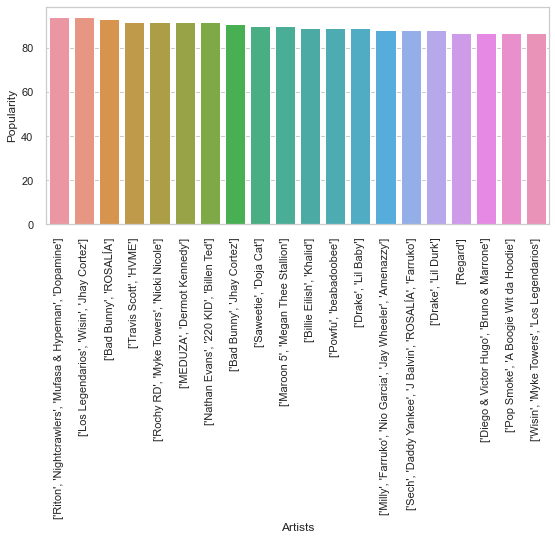

In [124]:
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
ax = sns.barplot(x='artists', y = 'popularity', data = top20)
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [125]:
more_songs = tracks.artists.value_counts()
more_songs.head()

['Die drei ???']         3856
['TKKG Retro-Archiv']    2006
['Benjamin Blümchen']    1503
['Bibi Blocksberg']      1472
['Lata Mangeshkar']      1373
Name: artists, dtype: int64

## Preprocessing, Training and Modeling

### Imports

In [173]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Splitting a data Train and Test 

In [174]:
feature_names = list(data.columns.values)
feature_names.remove('popularity')
feature_names.remove('artists')
feature_names.remove('id')
feature_names.remove('name')
#feature_names.remove('year')
feature_names.remove('release_date')
X = data[feature_names]
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### Random Forest Model

#### Making a Pipeline

In [ ]:
pipe15 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state = 42)
)

In [129]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

#### Using a $R^2$, Mean Square Error to Assess model performance

In [130]:
y_te_pred = pipe15.predict(X_test)

In [131]:
r2_score(y_test, y_te_pred)

0.8048574599263784

In [132]:
mean_absolute_error(y_test, y_te_pred)

6.757907592353597

####  Fit and assess performance using cross-validation

In [133]:
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve

cv_results = cross_validate(pipe15, X_train, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores


array([0.80482183, 0.79869933, 0.8058009 , 0.810553  , 0.80990704])

In [134]:
np.mean(cv_scores), np.std(cv_scores)

(0.805956418314009, 0.004259407834221302)

#### Hyperparameter search using GridSearchCV

In [135]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]        
}

In [136]:
rf_grid_cv = GridSearchCV(pipe15, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [152]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 615,
 'standardscaler': StandardScaler()}

In [153]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.8069058 , 0.80039096, 0.80754763, 0.81182829, 0.81158038])

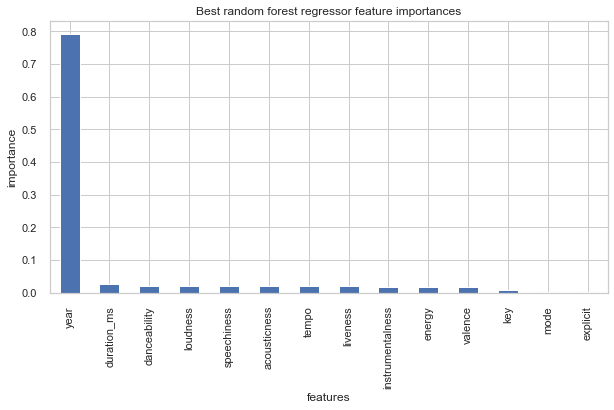

In [154]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

<AxesSubplot:xlabel='popularity'>

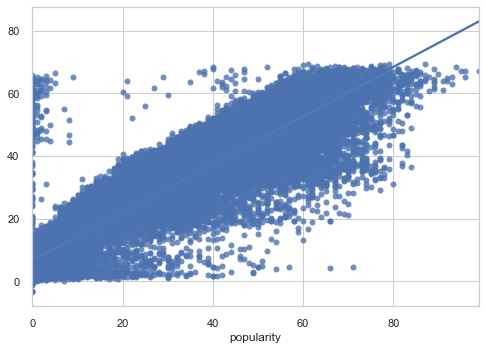

In [175]:
sns.regplot(y_test, y_pred)

FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestRegressor())

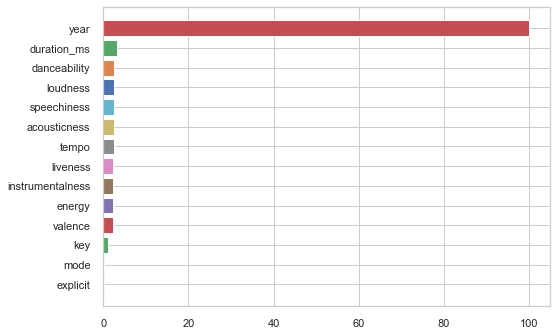

In [176]:
from yellowbrick.model_selection import FeatureImportances
FeatureImportances(rfc_model).fit(X_train, y_train)

### GradientBoosting Regressor

#### Define Model

In [162]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,validation_fraction=0.1,n_iter_no_change=15)
gbr.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.2, n_estimators=200,
                          n_iter_no_change=15)

In [163]:
y_pred = gbr.predict(X_test)

#### Using a $R^2$, Mean Square Error to Assess model performance

In [164]:
print(rmse(y_test,y_pred))

9.742179094820461


FeatureImportances(ax=<AxesSubplot:>,
                   estimator=GradientBoostingRegressor(learning_rate=0.2,
                                                       n_estimators=200,
                                                       n_iter_no_change=15))

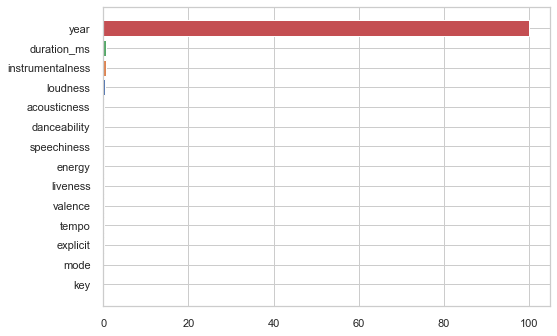

In [165]:
FeatureImportances(gbr).fit(X_train, y_train)

In [166]:
r2_score(y_test, y_pred)

0.8007422463777707

#### Fitting for learning rate, max_depth, min_samples_leaf, max_features

In [185]:
param_grid = {'learning_rate': [0.1,0.01], 
              'max_depth': [4,8,12],
              'min_samples_leaf': [3,5,7],  
              'max_features': [0.3,0.6]}

In [186]:
gb_cv = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1)
gb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(learning_rate=0.2,
                                                 n_estimators=200,
                                                 n_iter_no_change=15),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [4, 8, 12],
                         'max_features': [0.3, 0.6],
                         'min_samples_leaf': [3, 5, 7]})

In [187]:
gb_cv.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features=0.6, min_samples_leaf=5,
                          n_estimators=200, n_iter_no_change=15)

In [188]:
bp = gb_cv.best_params_
print('Best Params: \n',bp)
print('Score: ',gb_cv.score(X_train, y_train))
print('MSE: ',mean_squared_error(y_train, gb_cv.predict(X_train)))
print('MAE: ',mean_absolute_error(y_train, gb_cv.predict(X_train)))

Best Params: 
 {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.6, 'min_samples_leaf': 5}
Score:  0.8330258043745894
MSE:  79.54657356702391
MAE:  6.313068206935628


In [189]:
param_grid2 = {'learning_rate': [0.1,0.01,0.001]}
gb2 = GradientBoostingRegressor(n_estimators=1000, 
                                loss="huber", 
                                max_depth=bp['max_depth'],
                                max_features=bp['max_features'],
                                min_samples_leaf=bp['min_samples_leaf'])
gb2_cv = GridSearchCV(gb2,param_grid2,cv=5)
gb2_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='huber', max_depth=8,
                                                 max_features=0.6,
                                                 min_samples_leaf=5,
                                                 n_estimators=1000),
             param_grid={'learning_rate': [0.1, 0.01, 0.001]})

In [190]:
gb2_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=8,
                          max_features=0.6, min_samples_leaf=5,
                          n_estimators=1000)

In [192]:
bp2 = gb2_cv.best_params_
print('Best Params: \n',bp2)
print('Score: ',gb2_cv.score(X_train, y_train))
print('MSE: ',mean_squared_error(y_train, gb2_cv.predict(X_train)))
print('MAE: ',mean_absolute_error(y_train, gb2_cv.predict(X_train)))

Best Params: 
 {'learning_rate': 0.01}
Score:  0.8294520496694148
MSE:  81.24911173767289
MAE:  6.090349929423605


In [195]:
feature_imp = gb2_cv.best_estimator_.feature_importances_
feature_imp

array([2.66596980e-03, 7.84071920e-01, 9.87179456e-02, 4.14849040e-03,
       9.49849468e-03, 3.91258142e-02, 4.68935415e-03, 9.89865216e-03,
       4.79073128e-04, 2.87720595e-03, 2.78821410e-02, 2.11956851e-04,
       1.31638011e-02, 2.56918078e-03])

### Neural Network

#### Imports

In [167]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
print(tf.__version__)

2.5.0


#### Scale data

In [168]:
mm_scaler = MinMaxScaler()
X_train_sc = mm_scaler.fit_transform(X_train)
X_test_sc = mm_scaler.transform(X_test)
X_train_sc.shape

(136522, 14)

#### Define Model

In [169]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(64,activation="relu"),
                             tf.keras.layers.Dense(1)
])

# Defining RMSE Metric
rmse = tf.keras.metrics.RootMeanSquaredError()

# Compiling our Model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse])

In [170]:
model_fit = model.fit(x=X_train_sc,y=y_train,epochs=40, validation_data=(X_test_sc,y_test))

Epoch 1/40
4267/4267 [==============================] - 7s 869us/step - loss: 141.4899 - root_mean_squared_error: 11.8950 - val_loss: 107.9747 - val_root_mean_squared_error: 10.3911
Epoch 2/40
4267/4267 [==============================] - 4s 835us/step - loss: 109.3610 - root_mean_squared_error: 10.4576 - val_loss: 104.5526 - val_root_mean_squared_error: 10.2251
Epoch 3/40
4267/4267 [==============================] - 3s 810us/step - loss: 107.3811 - root_mean_squared_error: 10.3625 - val_loss: 103.2698 - val_root_mean_squared_error: 10.1622
Epoch 4/40
4267/4267 [==============================] - 3s 802us/step - loss: 105.7656 - root_mean_squared_error: 10.2842 - val_loss: 102.7990 - val_root_mean_squared_error: 10.1390
Epoch 5/40
4267/4267 [==============================] - 3s 818us/step - loss: 104.9441 - root_mean_squared_error: 10.2442 - val_loss: 103.9962 - val_root_mean_squared_error: 10.1979
Epoch 6/40
4267/4267 [==============================] - 3s 806us/step - loss: 103.8250 - r

In [171]:
y_pred = model.predict(X_test_sc)
print(float(rmse(y_test,y_pred)))

9.857202529907227


In [172]:
r2_score(y_test, y_pred)

0.7960092799824642

## Summary